In [2]:
import numpy as np
from glob import glob
from collections import defaultdict
from matplotlib import pyplot as plt
import open3d as o3d

In [3]:
files = glob('trainval/*/*_bbox.bin')

labels = []
cats = defaultdict(list)
for file in files:
    bbox = np.fromfile(file, dtype=np.float32)
    labels.append(bbox[9])
    cats[bbox[9]].append(file)
    
print(labels)

[5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 13.0, 13.0, 3.0, 1.0, 13.0, 13.0, 1.0, 5.0, 5.0, 13.0, 13.0, 13.0, 13.0, 1.0, 1.0, 13.0, 18.0, 5.0, 5.0, 5.0, 5.0, 18.0, 18.0, 5.0, 5.0, 13.0, 13.0, 1.0, 1.0, 13.0, 13.0, 5.0, 5.0, 13.0, 13.0, 3.0, 3.0, 5.0, 5.0, 5.0, 18.0, 18.0, 3.0, 5.0, 5.0, 3.0, 13.0, 5.0, 5.0, 13.0, 13.0, 1.0, 1.0, 5.0, 1.0, 13.0, 13.0, 2.0, 2.0, 4.0, 6.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 6.0, 6.0, 4.0, 5.0, 2.0, 13.0, 4.0, 4.0, 4.0, 4.0, 13.0, 13.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 6.0, 2.0, 4.0, 4.0, 4.0, 4.0, 1.0, 1.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 1.0, 1.0, 1.0, 1.0, 7.0, 1.0, 1.0, 7.0, 7.0, 1.0, 1.0, 7.0, 7.0, 7.0, 7.0, 1.0, 1.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 1.0, 1.0, 7.0, 7.0, 1.0, 1.0, 7.0, 7.0, 7.0, 2.0, 7.0, 1.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 1.0, 1.0, 7.0, 7.0, 1.0, 1.0, 7.0, 7.0, 7.0, 7.0, 1.0, 7.0, 1.0, 1.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 1.0, 1.0, 7

In [4]:
len(labels)

7573

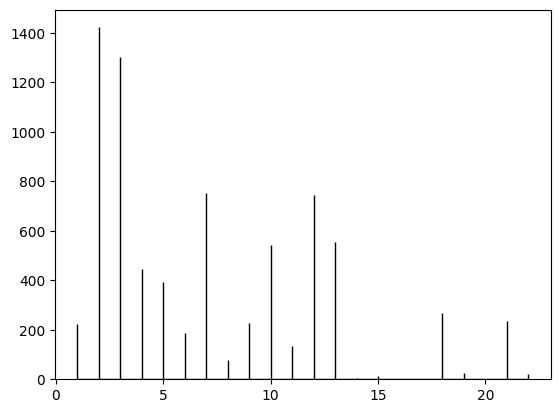

In [5]:


plt.hist(labels, bins=len(labels), edgecolor='black')
plt.show()

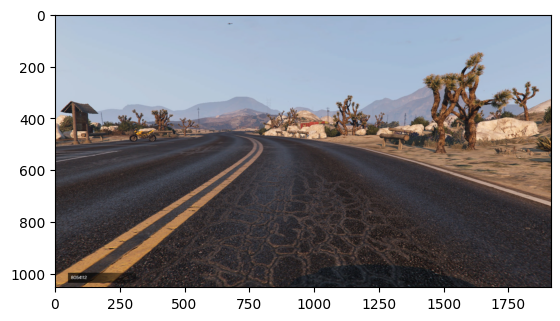

In [6]:
img = plt.imread(cats[9][5].replace('_bbox.bin', '_image.jpg'))
plt.imshow(img)

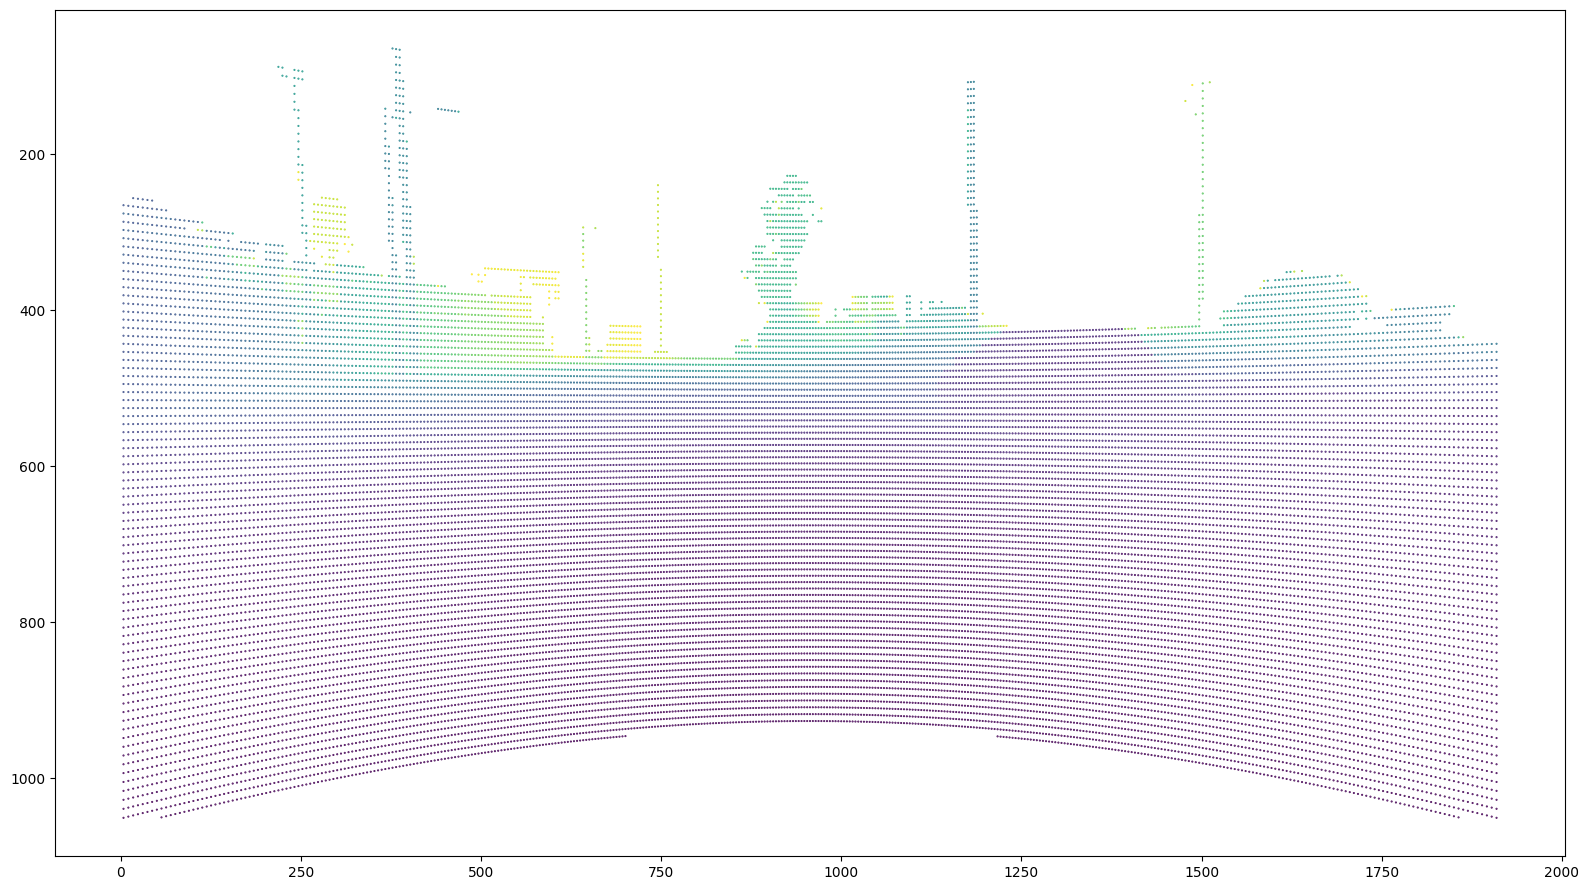

In [7]:
current_file = cats[2][5]

xyz = np.fromfile(current_file.replace('_bbox.bin', '_cloud.bin'), dtype=np.float32)
xyz = xyz.reshape([3, -1])

proj = np.fromfile(current_file.replace('_bbox.bin', '_proj.bin'), dtype=np.float32)
proj.resize([3, 4])

bbox = np.fromfile(current_file, dtype=np.float32)

img = plt.imread(current_file.replace('_bbox.bin', '_image.jpg'))

uv = proj @ np.vstack([xyz, np.ones_like(xyz[0, :])])
uv = uv / uv[2,:]

dist = np.linalg.norm(xyz, axis=0)
fig1 = plt.figure(1, figsize=(16, 9))
ax1 = fig1.add_subplot(1, 1, 1)
# ax1.imshow(img)
ax1.scatter(uv[0, :], uv[1, :], c=dist, marker='.', s=1)
fig1.tight_layout()
plt.gca().invert_yaxis()
plt.show()

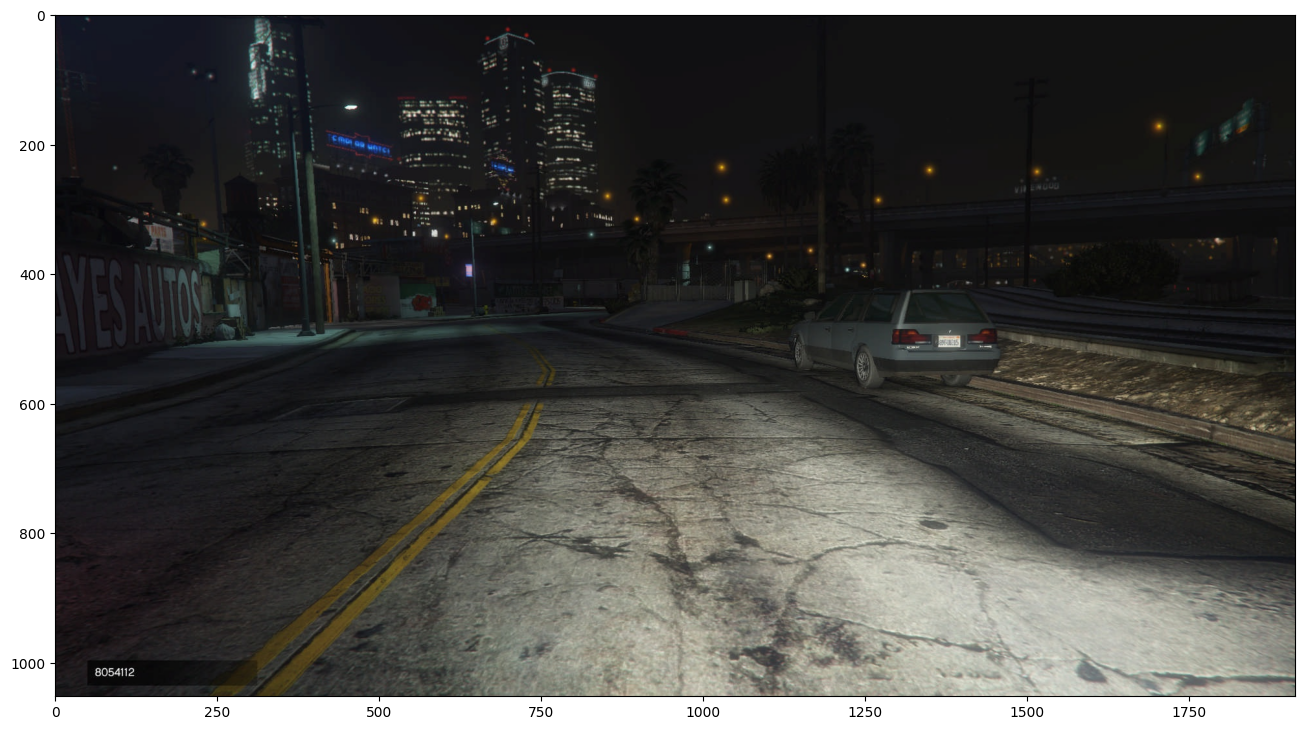

In [8]:
img = plt.imread(current_file.replace('_bbox.bin', '_image.jpg'))
fig1 = plt.figure(1, figsize=(16, 9))
ax1 = fig1.add_subplot(1, 1, 1)
ax1.imshow(img)
plt.show()

In [9]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz.T)

In [10]:
# o3d.visualization.draw_geometries([pcd],
#                                   zoom=0.3412,
#                                   front=[0.4257, -0.2125, -0.8795],
#                                   lookat=[1.6172, 2.0475, 1.532],
#                                   up=[-0.0694, -0.9768, 0.2024])